# ML Model to Predict Bike Demand on a Given Day

## Purpose

The purpose of this model is to predict how much demand for bikes would be on a certain day based off certain features that were explored with the Capital Bikeshare dataset in Washington, DC. Some of the scenarios where this information would be useful:
- To forsee days of high demand thus requiring higher levels of preparation and maintenance to ensure a smooth experience among riders
    - For example, we saw that each summer, there is a higher level of demand, particularly among the casual riders, and that each fall, there is a high level of demand among the members of Capital Bikeshare
- To forecast growth of captial bikeshare year after year to inform goals on bike manufacturing, stations, and marketing
- If bad weather is predicted, what that could mean for losses on revenue

## Information from EDA

The EDA found that the following factors contribute to bike demand (total rides and total minutes for a given day) based on a large number of factors:
- the date
- the time of year (the date)
- what year it is (the date)
- temperature
- hours of daylight
- whether it snows
- how long precipitation (of any kind) is occurring throughout the day
- the amount of liquid precipitation
- the amount of snow accumulation
- the dew point
- the relative humidity

The following variables are continuous:
- the date
- the temperature
- the hours of daylight
- the dew point
- the relative humidity

The following variables are discrete/categorical:
- Whether it snows
- Whether there is a nonzero level of snow accumulation
- Coverage of precipitation throughout the day
- The amount of precipitation (categorized)

## Project Code

### Dimensionality Reduction

**Should dimensionality reduction be used?**

It's possible that each of the continuous variables have some level of collinearity, and it is possible that there is some interactions between the categorical and the continuous variables (for example, it is likely that the temperature will be lower if it will snow).   

The question is does this warrant some kind of dimensionality reduction?

To determine that, the continuous variables should be plotted against each other.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
rides_weather = pd.read_csv('rides_weather.csv', index_col = 0)
rides_weather.head(5)

,date,total_rides,total_duration_mins,temp,feelslike,dew,humidity,precip,precipprob,precipcover,...,snow,snowdepth,windgust,windspeed,sunrise,sunset,daylight,precipLevel,snowLevel,snowDepthLevel
index,,,,,,,,,,,,,,,,,,,,,
0,2020-05-02,9028,897015.15,16.3,16.3,6.4,54.0,0.000,0,0.00,...,0.0,0.0,39.6,26.1,2020-05-02 06:08:30,2020-05-02 20:02:13,13.895278,0,0,0
1,2020-05-03,3663,190313.00,18.6,18.6,13.4,72.5,10.234,100,16.67,...,0.0,0.0,46.8,21.4,2020-05-03 06:07:21,2020-05-03 20:03:11,13.930556,10 < x <= 20,0,0
2,2020-05-04,3718,230021.55,19.2,19.2,7.8,53.8,15.555,100,12.50,...,0.0,0.0,68.8,44.9,2020-05-04 06:06:12,2020-05-04 20:04:08,13.965556,10 < x <= 20,0,0
3,2020-05-05,2374,90237.02,12.3,12.1,3.3,55.6,4.488,100,16.67,...,0.0,0.0,28.4,24.0,2020-05-05 06:05:06,2020-05-05 20:05:05,13.999722,0 < x <= 10,0,0
4,2020-05-06,1385,53953.22,11.2,10.5,7.8,80.9,1.657,100,33.33,...,0.0,0.0,42.7,27.0,2020-05-06 06:04:00,2020-05-06 20:06:02,14.033889,0 < x <= 10,0,0


In [3]:
rides_weather.dtypes

date                    object
total_rides              int64
total_duration_mins    float64
temp                   float64
feelslike              float64
dew                    float64
humidity               float64
precip                 float64
precipprob               int64
precipcover            float64
preciptype              object
snow                   float64
snowdepth              float64
windgust               float64
windspeed              float64
sunrise                 object
sunset                  object
daylight               float64
precipLevel             object
snowLevel               object
snowDepthLevel          object
dtype: object

In [4]:
# Convert data types
rides_weather['date'] = pd.to_datetime(rides_weather['date'])
rides_weather['preciptype'] = rides_weather['preciptype'].astype('string')
rides_weather['sunrise'] = pd.to_datetime(rides_weather['sunrise'])
rides_weather['sunset'] = pd.to_datetime(rides_weather['sunset'])
rides_weather['precipLevel'] = rides_weather['precipLevel'].astype('string')
rides_weather['snowLevel'] = rides_weather['snowLevel'].astype('string')
rides_weather['snowDepthLevel'] = rides_weather['snowDepthLevel'].astype('string')

# Create a date delta column for more accurate analysis
rides_weather['date_delta'] = (rides_weather['date'] - rides_weather['date'].min()) / (np.timedelta64(1, 'D'))



rides_weather.dtypes

date                   datetime64[ns]
total_rides                     int64
total_duration_mins           float64
temp                          float64
feelslike                     float64
dew                           float64
humidity                      float64
precip                        float64
precipprob                      int64
precipcover                   float64
preciptype             string[python]
snow                          float64
snowdepth                     float64
windgust                      float64
windspeed                     float64
sunrise                datetime64[ns]
sunset                 datetime64[ns]
daylight                      float64
precipLevel            string[python]
snowLevel              string[python]
snowDepthLevel         string[python]
date_delta                    float64
dtype: object

In [5]:
rides_weather = rides_weather.sort_values(by = 'date', axis = 0)
rides_weather = rides_weather.reset_index()
rides_weather = rides_weather.drop(labels = ['index'], axis = 1)
rides_weather.head(5)

,date,total_rides,total_duration_mins,temp,feelslike,dew,humidity,precip,precipprob,precipcover,...,snowdepth,windgust,windspeed,sunrise,sunset,daylight,precipLevel,snowLevel,snowDepthLevel,date_delta
0,2020-05-01,2969,91076.58,14.9,14.9,8.9,69.6,2.607,100,29.17,...,0.0,38.9,25.7,2020-05-01 06:09:41,2020-05-01 20:01:16,13.859722,0 < x <= 10,0,0,0.0
1,2020-05-02,9028,897015.15,16.3,16.3,6.4,54.0,0.000,0,0.00,...,0.0,39.6,26.1,2020-05-02 06:08:30,2020-05-02 20:02:13,13.895278,0,0,0,1.0
2,2020-05-03,3663,190313.00,18.6,18.6,13.4,72.5,10.234,100,16.67,...,0.0,46.8,21.4,2020-05-03 06:07:21,2020-05-03 20:03:11,13.930556,10 < x <= 20,0,0,2.0
3,2020-05-04,3718,230021.55,19.2,19.2,7.8,53.8,15.555,100,12.50,...,0.0,68.8,44.9,2020-05-04 06:06:12,2020-05-04 20:04:08,13.965556,10 < x <= 20,0,0,3.0
4,2020-05-05,2374,90237.02,12.3,12.1,3.3,55.6,4.488,100,16.67,...,0.0,28.4,24.0,2020-05-05 06:05:06,2020-05-05 20:05:05,13.999722,0 < x <= 10,0,0,4.0


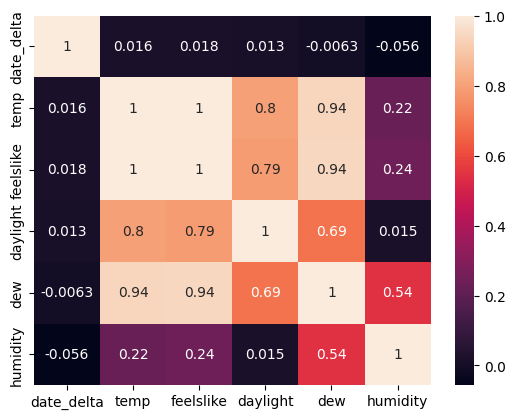

In [6]:
cont_data = rides_weather[['date_delta', 'temp', 'feelslike', 'daylight', 'dew', 'humidity']]

correlation_matrix = cont_data.corr()

hm = sns.heatmap(data = correlation_matrix, annot = True)
plt.show()

As we can see from the heatmap, there is a large amount of correlation between a handful of continuous variables. This would present a collinearity problem, and thus it would be best to use dimensionality reduction to reduce collinearity.

We will investigate whether principal component analysis (PCA) would be a good fit for this task.

In [7]:
cont_data

,date_delta,temp,feelslike,daylight,dew,humidity
0,0.0,14.9,14.9,13.859722,8.9,69.6
1,1.0,16.3,16.3,13.895278,6.4,54.0
2,2.0,18.6,18.6,13.930556,13.4,72.5
3,3.0,19.2,19.2,13.965556,7.8,53.8
4,4.0,12.3,12.1,13.999722,3.3,55.6
...,...,...,...,...,...,...
1576,1579.0,27.7,27.9,13.203889,18.9,62.4
1577,1580.0,30.2,31.9,13.164167,20.4,58.7
1578,1581.0,28.1,30.3,13.124167,21.9,69.7
1579,1582.0,22.9,22.9,13.084167,20.8,87.6


In [8]:
cont_data_matrix = cont_data.to_numpy()
cont_data_matrix

array([[0.00000000e+00, 1.49000000e+01, 1.49000000e+01, 1.38597222e+01,
        8.90000000e+00, 6.96000000e+01],
       [1.00000000e+00, 1.63000000e+01, 1.63000000e+01, 1.38952778e+01,
        6.40000000e+00, 5.40000000e+01],
       [2.00000000e+00, 1.86000000e+01, 1.86000000e+01, 1.39305556e+01,
        1.34000000e+01, 7.25000000e+01],
       ...,
       [1.58100000e+03, 2.81000000e+01, 3.03000000e+01, 1.31241667e+01,
        2.19000000e+01, 6.97000000e+01],
       [1.58200000e+03, 2.29000000e+01, 2.29000000e+01, 1.30841667e+01,
        2.08000000e+01, 8.76000000e+01],
       [1.58300000e+03, 2.41000000e+01, 2.44000000e+01, 1.30438889e+01,
        2.03000000e+01, 8.01000000e+01]])

Standardize data

In [9]:
standardized_data = (cont_data_matrix - cont_data_matrix.mean(axis = 0)) / cont_data_matrix.std(axis = 0)
standardized_data

array([[-1.73114198, -0.15437512, -0.08058526,  0.78719273,  0.01675023,
         0.42793948],
       [-1.72895371,  0.00419089,  0.0555419 ,  0.80594015, -0.24075765,
        -0.72165351],
       [-1.72676544,  0.26469218,  0.27917938,  0.8245411 ,  0.4802644 ,
         0.64164587],
       ...,
       [ 1.7285108 ,  1.34067578,  1.41681354,  0.39935553,  1.35579117,
         0.43530867],
       [ 1.73069907,  0.75171634,  0.69728424,  0.37826469,  1.2424877 ,
         1.75439293],
       [ 1.73288733,  0.88763005,  0.84313478,  0.35702738,  1.19098613,
         1.201704  ]])

Calculate covariance matrix

In [10]:
covariance_matrix = np.cov(standardized_data, ddof = 1, rowvar = False)
covariance_matrix

array([[ 1.00063291,  0.01603965,  0.01768419,  0.01279526, -0.00631303,
        -0.05616281],
       [ 0.01603965,  1.00063291,  0.99753135,  0.79773731,  0.93966696,
         0.22461157],
       [ 0.01768419,  0.99753135,  1.00063291,  0.78653251,  0.94307969,
         0.24275836],
       [ 0.01279526,  0.79773731,  0.78653251,  1.00063291,  0.68978018,
         0.01547879],
       [-0.00631303,  0.93966696,  0.94307969,  0.68978018,  1.00063291,
         0.54270766],
       [-0.05616281,  0.22461157,  0.24275836,  0.01547879,  0.54270766,
         1.00063291]])

Calculate the eigenvalues and eigenvectors of the covariance matrix

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [12]:
eigenvalues

array([3.69124965e+00, 1.09790912e+00, 9.64032635e-01, 2.45288938e-01,
       4.27433414e-03, 1.04278893e-03])

In [13]:
eigenvectors

array([[ 3.22359175e-03,  5.25111257e-01, -8.50747745e-01,
         2.16989703e-02, -2.27466583e-03,  1.72706567e-04],
       [ 5.09971952e-01,  1.06241787e-01,  6.05075337e-02,
        -3.11389613e-01, -2.96236276e-01,  7.35024290e-01],
       [ 5.10082140e-01,  9.07122787e-02,  4.74624081e-02,
        -3.28696848e-01,  7.61568958e-01, -2.03238570e-01],
       [ 4.31260273e-01,  3.09575566e-01,  2.13593356e-01,
         8.19949511e-01,  1.24110927e-02, -9.17539056e-03],
       [ 5.06400871e-01, -1.75325639e-01, -1.09299139e-01,
        -1.70213692e-01, -5.47697853e-01, -6.09858293e-01],
       [ 1.93150616e-01, -7.60372292e-01, -4.61243979e-01,
         3.05342666e-01,  1.79233489e-01,  2.15457704e-01]])

The eigenvalue tells you the strength or influence of its respective eigenvector, or the characteristic vector of the principal component.

The eigenvectors are represented by each column in the above matrix (as that is what the np.linalg.eig function returns)

In [14]:
order_of_importance = np.argsort(eigenvalues)[::-1] #[::-1] reverses the list
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:, order_of_importance]

print(sorted_eigenvalues)
print(sorted_eigenvectors)

[3.69124965e+00 1.09790912e+00 9.64032635e-01 2.45288938e-01
 4.27433414e-03 1.04278893e-03]
[[ 3.22359175e-03  5.25111257e-01 -8.50747745e-01  2.16989703e-02
  -2.27466583e-03  1.72706567e-04]
 [ 5.09971952e-01  1.06241787e-01  6.05075337e-02 -3.11389613e-01
  -2.96236276e-01  7.35024290e-01]
 [ 5.10082140e-01  9.07122787e-02  4.74624081e-02 -3.28696848e-01
   7.61568958e-01 -2.03238570e-01]
 [ 4.31260273e-01  3.09575566e-01  2.13593356e-01  8.19949511e-01
   1.24110927e-02 -9.17539056e-03]
 [ 5.06400871e-01 -1.75325639e-01 -1.09299139e-01 -1.70213692e-01
  -5.47697853e-01 -6.09858293e-01]
 [ 1.93150616e-01 -7.60372292e-01 -4.61243979e-01  3.05342666e-01
   1.79233489e-01  2.15457704e-01]]


Calculate the explained variance

In [15]:
explained_var = sorted_eigenvalues/(np.sum(sorted_eigenvalues))
explained_var

array([6.14819149e-01, 1.82869114e-01, 1.60570479e-01, 4.08556316e-02,
       7.11938429e-04, 1.73688226e-04])

Make a scree plot

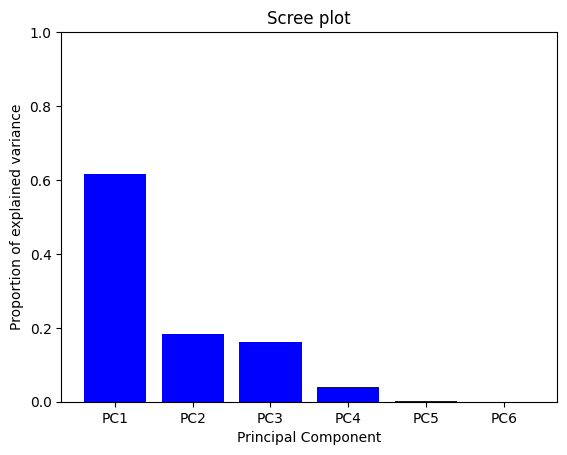

In [16]:
fig, ax = plt.subplots()

x = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
y = explained_var

plt.bar(x, y, color = 'blue')
ax.set_ylim([0, 1])
plt.xlabel('Principal Component')
plt.ylabel('Proportion of explained variance')
plt.title('Scree plot')
plt.show()

In [17]:
np.sum(explained_var[0:3])

0.9582587417506968

As shown from the scree plot and the sum of the first three explained variances, 95% of the data can be explained with three principal components. Thus, this dimensionality reduction will be useful to the model. So, the first three eigenvectors will be used to transform the data.

In [18]:
# Original code DONT USE FOR NOW
# Show the eigenvectors that will be used
print(f'Eigenvectors that will be used:\n{sorted_eigenvectors[:, :3]}')

Eigenvectors that will be used:
[[ 0.00322359  0.52511126 -0.85074775]
 [ 0.50997195  0.10624179  0.06050753]
 [ 0.51008214  0.09071228  0.04746241]
 [ 0.43126027  0.30957557  0.21359336]
 [ 0.50640087 -0.17532564 -0.10929914]
 [ 0.19315062 -0.76037229 -0.46124398]]


In [19]:
# # Show the eigenvectors that will be used
# print(f'Eigenvectors that will be used:\n{sorted_eigenvectors[:3, :]}')

In [20]:
dimension_matrix = sorted_eigenvectors[:, :3]
dimension_matrix

array([[ 0.00322359,  0.52511126, -0.85074775],
       [ 0.50997195,  0.10624179,  0.06050753],
       [ 0.51008214,  0.09071228,  0.04746241],
       [ 0.43126027,  0.30957557,  0.21359336],
       [ 0.50640087, -0.17532564, -0.10929914],
       [ 0.19315062, -0.76037229, -0.46124398]])

In [21]:
# dimension_matrix = sorted_eigenvectors[:3, :].transpose()
# dimension_matrix

Transform the original data to the principal components by matrix multiplying the standardized data with the first three eigenvectors

In [22]:
print(f'{standardized_data.shape}*{dimension_matrix.shape}')

(1581, 6)*(6, 3)


In [23]:
transformed_cont_data = np.matmul(standardized_data, dimension_matrix)
transformed_cont_data

array([[ 0.30521148, -1.01738774,  1.42852335],
       [ 0.11115699, -0.06197378,  2.0051096 ],
       [ 0.99455604, -1.17013223,  1.32597692],
       ...,
       [ 2.35485048,  0.73354777, -1.58583092],
       [ 1.87579502, -0.38280473, -2.25802023],
       [ 1.87751855,  0.06871885, -1.9887183 ]])

**Do we get the same result with sklearn?**

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
cont_data_skl = cont_data.values
cont_data_skl

array([[0.00000000e+00, 1.49000000e+01, 1.49000000e+01, 1.38597222e+01,
        8.90000000e+00, 6.96000000e+01],
       [1.00000000e+00, 1.63000000e+01, 1.63000000e+01, 1.38952778e+01,
        6.40000000e+00, 5.40000000e+01],
       [2.00000000e+00, 1.86000000e+01, 1.86000000e+01, 1.39305556e+01,
        1.34000000e+01, 7.25000000e+01],
       ...,
       [1.58100000e+03, 2.81000000e+01, 3.03000000e+01, 1.31241667e+01,
        2.19000000e+01, 6.97000000e+01],
       [1.58200000e+03, 2.29000000e+01, 2.29000000e+01, 1.30841667e+01,
        2.08000000e+01, 8.76000000e+01],
       [1.58300000e+03, 2.41000000e+01, 2.44000000e+01, 1.30438889e+01,
        2.03000000e+01, 8.01000000e+01]])

In [26]:
scaled_data_skl = StandardScaler().fit_transform(cont_data_skl)
scaled_data_skl

array([[-1.73114198, -0.15437512, -0.08058526,  0.78719273,  0.01675023,
         0.42793948],
       [-1.72895371,  0.00419089,  0.0555419 ,  0.80594015, -0.24075765,
        -0.72165351],
       [-1.72676544,  0.26469218,  0.27917938,  0.8245411 ,  0.4802644 ,
         0.64164587],
       ...,
       [ 1.7285108 ,  1.34067578,  1.41681354,  0.39935553,  1.35579117,
         0.43530867],
       [ 1.73069907,  0.75171634,  0.69728424,  0.37826469,  1.2424877 ,
         1.75439293],
       [ 1.73288733,  0.88763005,  0.84313478,  0.35702738,  1.19098613,
         1.201704  ]])

In [27]:
PCA_cont_data = PCA(n_components = 3)
transformed_cont_data_skl = PCA_cont_data.fit_transform(scaled_data_skl)
transformed_cont_data_skl

array([[-0.30521148,  1.01738774,  1.42852335],
       [-0.11115699,  0.06197378,  2.0051096 ],
       [-0.99455604,  1.17013223,  1.32597692],
       ...,
       [-2.35485048, -0.73354777, -1.58583092],
       [-1.87579502,  0.38280473, -2.25802023],
       [-1.87751855, -0.06871885, -1.9887183 ]])

Lets compare the results

In [28]:
print('Results from PCA')
print(f'From scratch:\n{transformed_cont_data}')

print(f'With sklearn:\n{transformed_cont_data_skl}')

Results from PCA
From scratch:
[[ 0.30521148 -1.01738774  1.42852335]
 [ 0.11115699 -0.06197378  2.0051096 ]
 [ 0.99455604 -1.17013223  1.32597692]
 ...
 [ 2.35485048  0.73354777 -1.58583092]
 [ 1.87579502 -0.38280473 -2.25802023]
 [ 1.87751855  0.06871885 -1.9887183 ]]
With sklearn:
[[-0.30521148  1.01738774  1.42852335]
 [-0.11115699  0.06197378  2.0051096 ]
 [-0.99455604  1.17013223  1.32597692]
 ...
 [-2.35485048 -0.73354777 -1.58583092]
 [-1.87579502  0.38280473 -2.25802023]
 [-1.87751855 -0.06871885 -1.9887183 ]]


In [29]:
print('The eigenvectors used: ')

print(f'From scratch:\n {dimension_matrix}')
print(f'With sklearn:\n {PCA_cont_data.fit(scaled_data_skl).components_.transpose()}')

The eigenvectors used: 
From scratch:
 [[ 0.00322359  0.52511126 -0.85074775]
 [ 0.50997195  0.10624179  0.06050753]
 [ 0.51008214  0.09071228  0.04746241]
 [ 0.43126027  0.30957557  0.21359336]
 [ 0.50640087 -0.17532564 -0.10929914]
 [ 0.19315062 -0.76037229 -0.46124398]]
With sklearn:
 [[-0.00322359 -0.52511126 -0.85074775]
 [-0.50997195 -0.10624179  0.06050753]
 [-0.51008214 -0.09071228  0.04746241]
 [-0.43126027 -0.30957557  0.21359336]
 [-0.50640087  0.17532564 -0.10929914]
 [-0.19315062  0.76037229 -0.46124398]]


The results have differences in the signage of the second and third columns because the first and second eigenvectors computed by sklearn have opposite signs. While the signs are opposite, the eigenvectors computed by scratch and from sklearn are equivalent because they are simply scaled from each other by -1, and this will not change the position of the datapoints in the new space. Therefore, both solutions are equal and valid.

### Linear Regression

To carry out the linear regression we will combine the prinicpal components data with the discrete variables data to a dataframe

In [30]:
# Combine the PCA data with the discrete variables to make a dataframe
df = pd.DataFrame({
    'PC1': transformed_cont_data[:, 0],
    'PC2': transformed_cont_data[:, 1],
    'PC3': transformed_cont_data[:, 2],
    'SnowLevel': rides_weather.loc[:, 'snowLevel'],
    'PrecipCover': rides_weather.loc[:, 'precipcover'],
    'PrecipLevel': rides_weather.loc[:, 'precipLevel'],
    'TotalRides': rides_weather.loc[:, 'total_rides'],
    'TotalRideMins': rides_weather.loc[:, 'total_duration_mins']
})

df.head(5)

,PC1,PC2,PC3,SnowLevel,PrecipCover,PrecipLevel,TotalRides,TotalRideMins
0,0.305211,-1.017388,1.428523,0,29.17,0 < x <= 10,2969,91076.58
1,0.111157,-0.061974,2.005110,0,0.00,0,9028,897015.15
2,0.994556,-1.170132,1.325977,0,16.67,10 < x <= 20,3663,190313.00
3,0.508666,-0.001805,2.033595,0,12.50,10 < x <= 20,3718,230021.55
4,-0.443346,-0.160326,1.945008,0,16.67,0 < x <= 10,2374,90237.02


Set up X and y

In [31]:
X = df.drop(['TotalRides', 'TotalRideMins'], axis = 1)
y = df['TotalRides']

Use the one hot encoder to make the preprocessing transformation

In [32]:
from sklearn.preprocessing import OneHotEncoder

#Creates a dataframe of encoded variables
cat_vars = X.loc[:, ['SnowLevel', 'PrecipCover', 'PrecipLevel']]
ohe = OneHotEncoder()
cat_df = ohe.fit_transform(cat_vars)
cat_df = pd.DataFrame(cat_df.toarray(), columns = ohe.get_feature_names_out(), dtype = int)

# Creates a dataframe of numerical variables
num_vars = X.drop(['SnowLevel', 'PrecipCover', 'PrecipLevel'], axis = 1)

# Joins the two dataframes together and prints out the result
X_preprocessed = num_vars.merge(cat_df, left_index = True, right_index = True)
X_preprocessed.head(5)

,PC1,PC2,PC3,SnowLevel_0,SnowLevel_> 0,PrecipCover_0.0,PrecipCover_4.17,PrecipCover_8.33,PrecipCover_12.5,PrecipCover_16.67,...,PrecipCover_79.17,PrecipCover_83.33,PrecipCover_87.5,PrecipCover_91.67,PrecipCover_95.83,PrecipLevel_0,PrecipLevel_0 < x <= 10,PrecipLevel_10 < x <= 20,PrecipLevel_20 < x <= 30,PrecipLevel_> 30
0,0.305211,-1.017388,1.428523,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.111157,-0.061974,2.005110,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.994556,-1.170132,1.325977,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.508666,-0.001805,2.033595,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.443346,-0.160326,1.945008,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Define a linear regression model and fit it to the data

In [33]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Define a train-test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size = 0.2, random_state = 1)

# Define a linear regression model
mdl = LinearRegression()
# Train the model
mdl.fit(X_train, y_train)

# Make predictions
y_hat = mdl.predict(X_test)

# Make predictions on training data
y_hat_train = mdl.predict(X_train)

In [34]:
# Evaluating the model

# Test data
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(f'RMSE (test data): {rmse}')

# Training data
mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = np.sqrt(mse_train)
print(f'RMSE (training data): {rmse_train}')

RMSE (test data): 2199.2845836388524
RMSE (training data): 1988.602177777037


In [35]:
# Calculating R-squared

# Test data
r_squared = r2_score(y_test, y_hat)
print(f'R-squared (test data): {r_squared}')

# Training data
r_squared_train = r2_score(y_train, y_hat_train)
print(f'R-squared (training data): {r_squared_train}')

R-squared (test data): 0.7944691572464271
R-squared (training data): 0.8279375835869147


Appoximately 79% of the variation in data can be explained by the linear regression model, with a typical estimate being off by approximately 2200 rides per day.

### Random Forest Regressor

In [36]:
# Import library
from sklearn.ensemble import RandomForestRegressor

# Define model object
rf_mdl = RandomForestRegressor(random_state = 1)

# Train the model
rf_mdl.fit(X_train, y_train)

# Make predictions (test data)
y_hat = rf_mdl.predict(X_test)

# Make predictions (training data)
y_hat_train = rf_mdl.predict(X_train)

In [37]:
# Evaluate the model

# Test data
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(f'RMSE (test data): {rmse}')

# Training data
mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = np.sqrt(mse_train)
print(f'RMSE (training data): {rmse_train}')

RMSE (test data): 1801.8193042204632
RMSE (training data): 679.9444510338857


In [38]:
# Calculating R-squared

# Test data
r_squared = r2_score(y_test, y_hat)
print(f'R-squared (test data): {r_squared}')

# Training data
r_squared_train = r2_score(y_train, y_hat_train)
print(f'R-squared (training data): {r_squared_train}')

R-squared (test data): 0.8620452640927836
R-squared (training data): 0.9798842113415799


The random forest regressor is much better than the linear regression, but there is some overfitting going on, so a gridsearch/regularization will be used to optimize performance.

In [39]:
# Import the library
from sklearn.model_selection import GridSearchCV

# Define a param grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [20, 10, 5],
    'min_samples_leaf': [20, 50, 100]
}

scoring = 'r2'

# Optimize parameters
rf_mdl_gcv = GridSearchCV(estimator = rf_mdl, param_grid = param_grid, cv = 5, scoring = scoring)
rf_mdl_gcv_results = rf_mdl_gcv.fit(X_train, y_train)

In [40]:
rf_mdl_gcv_results.best_params_

{'max_depth': 20, 'min_samples_leaf': 20, 'n_estimators': 100}

In [41]:
# Make predictions
y_hat = rf_mdl_gcv.predict(X_test)
y_hat_train = rf_mdl_gcv.predict(X_train)

# Evaluate the model

# Test data
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(f'RMSE (test data): {rmse}')

# Training data
mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = np.sqrt(mse_train)
print(f'RMSE (training data): {rmse_train}')

# Calculating R-squared

# Test data
r_squared = r2_score(y_test, y_hat)
print(f'R-squared (test data): {r_squared}')

# Training data
r_squared_train = r2_score(y_train, y_hat_train)
print(f'R-squared (training data): {r_squared_train}')

RMSE (test data): 2082.466506592585
RMSE (training data): 1834.0358679909061
R-squared (test data): 0.8157233988524324
R-squared (training data): 0.8536455789393181


These results show that the model can explain 81% of the variation with the current variables and that predictions made have a typical error of 1834 rides.